<a href="https://colab.research.google.com/github/Rafiryd/Rafiryd/blob/rafiryd/skripsi%20compre%20jum'at%20akurasi%2069.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proses Pengambilan data**

In [ ]:
!pip install google-play-scraper

In [ ]:
from google_play_scraper import app

import pandas as pd

import numpy as np

import seaborn as sns

In [ ]:
#Scrape desired number of reviews
#Run kode ini jika ingin scrape data dengan jumlah tertentu. Ganti (misal, ingin scrape sejumlah 1000, maka ganti kode , count = 1000 )

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.bukalapak.android',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=1300, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

Problems slovlig tools = mencari akar permasalahan pada suatu masalah

5 why

metode mencari problems sloving dengan cara menanyakan apa penyebab permasalahaan muncul dan mencari jawabannya. hal ini di lakUkan berkali klai sampai permasalahan dapat tergambar dengan jelas

action priority

diagram yang dapat di gunakan untuk mencari prioritas masalah berdasarkan impact atas benefit yang bisa diberikan dengan diagram ini kita memilih masalah yang impactnya mayoritas dari permasalahan yang ada.

fishbone digram

digram yang dapat di gunakan untuk merinci masalah dan membantu mencari akar masalah yang dapat dilihat dari beberapa point of view

flowchart/algo

metode pemecahan masalah dengan cara memetakan flow atau membuat pseudo algoritma yang untuk menentukan masalah dan cara untuk mencari solusinya secara sistematis

# **Data diproleh**

In [ ]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,8a1e53b2-0cca-49aa-9bc0-5084836892d1,yOga 04,https://play-lh.googleusercontent.com/a-/AD_cM...,Aplikasi marketplace paling ancur.. Sistem buk...,1,33,5.34.3,2023-08-01 03:19:16,None,NaT,5.34.3
1,ee89c8f1-7d27-45f3-8720-539a0965d0dc,Imagination Music Store,https://play-lh.googleusercontent.com/a-/AD_cM...,Aplikasi yg sangat ribet. Tiap mau edit produk...,1,31,5.34.3,2023-07-28 08:32:00,None,NaT,5.34.3
2,09caeb61-3922-48d4-8df0-b93ebf9d7e6a,Mas bagoess Kocak,https://play-lh.googleusercontent.com/a-/AD_cM...,Buka bantuan Bukalapak tidak berguna karena ti...,1,44,5.34.3,2023-07-27 22:26:26,None,NaT,5.34.3
3,18b4a740-9d95-4b62-a36f-9c718fd7dcbf,Sis Maya,https://play-lh.googleusercontent.com/a/AAcHTt...,Saya sangat sedih sekali belanja lewat mitra B...,1,55,5.34.2,2023-07-22 10:54:24,None,NaT,5.34.2
4,bb9513b0-9127-46da-9d3f-d9ddafeb807c,Gb Jkt,https://play-lh.googleusercontent.com/a/AAcHTt...,Makin lama makin mengerikan belanja di bukalap...,1,3,5.34.3,2023-08-01 03:57:42,None,NaT,5.34.3


In [ ]:
len(df_busu.index) #count the number of data we got

1300

In [ ]:
df_busu[['userName', 'score','at', 'content']].tail()  #preview userName, rating, date-time, and reviews only

,userName,score,at,content
1295,Pengguna Google,5,2019-08-12 19:12:25,"sya bingung tdk bisa login, karena no telepon ..."
1296,Pengguna Google,2,2018-12-14 14:06:35,Banyak yg bilang FlashDeal-nya seperti jin. Dl...
1297,Pengguna Google,1,2018-10-25 22:29:18,Saya mempunyai beberapa item yang sudah saya m...
1298,Pengguna Google,1,2019-04-11 07:54:28,menu kategori barang kok gak bisa menampilkan ...
1299,Reza Amelia,1,2021-11-24 05:41:54,Jangan pernah coba2 bayar angsuran kredit lewa...


# **Perubahan Penamaan Pada Setiap Kolom**

In [ ]:
name_dataframe = df_busu.loc[:,["userName", "score", "at", "content"]]
name_dataframe.rename(columns={"userName": "Nama pengguna", "score":"Rating", "at": "Date", "content": "Ulasan"}, inplace=True)

In [ ]:
name_dataframe.tail()

,Nama pengguna,Rating,Date,Ulasan
1295,Pengguna Google,5,2019-08-12 19:12:25,"sya bingung tdk bisa login, karena no telepon ..."
1296,Pengguna Google,2,2018-12-14 14:06:35,Banyak yg bilang FlashDeal-nya seperti jin. Dl...
1297,Pengguna Google,1,2018-10-25 22:29:18,Saya mempunyai beberapa item yang sudah saya m...
1298,Pengguna Google,1,2019-04-11 07:54:28,menu kategori barang kok gak bisa menampilkan ...
1299,Reza Amelia,1,2021-11-24 05:41:54,Jangan pernah coba2 bayar angsuran kredit lewa...


In [ ]:
name_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Nama pengguna  1300 non-null   object        
 1   Rating         1300 non-null   int64         
 2   Date           1300 non-null   datetime64[ns]
 3   Ulasan         1300 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 40.8+ KB


In [ ]:
import nltk

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].astype(str)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan
0,yOga 04,1,2023-08-01 03:19:16,Aplikasi marketplace paling ancur.. Sistem buk...
1,Imagination Music Store,1,2023-07-28 08:32:00,Aplikasi yg sangat ribet. Tiap mau edit produk...
2,Mas bagoess Kocak,1,2023-07-27 22:26:26,Buka bantuan Bukalapak tidak berguna karena ti...
3,Sis Maya,1,2023-07-22 10:54:24,Saya sangat sedih sekali belanja lewat mitra B...
4,Gb Jkt,1,2023-08-01 03:57:42,Makin lama makin mengerikan belanja di bukalap...


# **Case folding**

In [ ]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].str.lower()

# **cleansing**

In [ ]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_links)

In [ ]:
#menghapus number
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_number)

In [ ]:
#menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_punctuation)

In [ ]:
# menghapus single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_singl_char)

# **Tokenizing**

In [ ]:
# Tokenisasi
def word_tokenize_wrapper(text):
    return word_tokenize(text)

name_dataframe['Ulasan_tokenize'] = name_dataframe['Ulasan'].apply(word_tokenize_wrapper)

In [ ]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
0,yOga 04,1,2023-08-01 03:19:16,aplikasi marketplace paling ancur sistem bukab...,"[aplikasi, marketplace, paling, ancur, sistem,..."
1,Imagination Music Store,1,2023-07-28 08:32:00,aplikasi yg sangat ribet tiap mau edit produk ...,"[aplikasi, yg, sangat, ribet, tiap, mau, edit,..."
2,Mas bagoess Kocak,1,2023-07-27 22:26:26,buka bantuan bukalapak tidak berguna karena ti...,"[buka, bantuan, bukalapak, tidak, berguna, kar..."
3,Sis Maya,1,2023-07-22 10:54:24,saya sangat sedih sekali belanja lewat mitra b...,"[saya, sangat, sedih, sekali, belanja, lewat, ..."
4,Gb Jkt,1,2023-08-01 03:57:42,makin lama makin mengerikan belanja di bukalap...,"[makin, lama, makin, mengerikan, belanja, di, ..."
...,...,...,...,...,...
1295,Pengguna Google,5,2019-08-12 19:12:25,sya bingung tdk bisa login karena no telepon s...,"[sya, bingung, tdk, bisa, login, karena, no, t..."
1296,Pengguna Google,2,2018-12-14 14:06:35,banyak yg bilang flashdealnya seperti jin dlm ...,"[banyak, yg, bilang, flashdealnya, seperti, ji..."
1297,Pengguna Google,1,2018-10-25 22:29:18,saya mempunyai beberapa item yang sudah saya m...,"[saya, mempunyai, beberapa, item, yang, sudah,..."
1298,Pengguna Google,1,2019-04-11 07:54:28,menu kategori barang kok gak bisa menampilkan ...,"[menu, kategori, barang, kok, gak, bisa, menam..."


In [ ]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize'], dtype='object')

In [ ]:
#Run This Code to Sort the Data By Date
# tanggal 26-04-2022 sampai 12-10-2022

new_df = name_dataframe[['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize']]
sorted_df = new_df.sort_values(by='Date', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
786,Sondang Panjaitan,5,2023-08-07 06:36:03,lama lama buka lapak ga bertangung jawab penge...,"[lama, lama, buka, lapak, ga, bertangung, jawa..."
610,Zainal Fanani,1,2023-08-05 07:36:37,halaman komplain eror pelayananx makin jelek s...,"[halaman, komplain, eror, pelayananx, makin, j..."
776,alvin chanel,1,2023-08-03 11:55:23,bukalapakgk bisa batalin pesananbutuh bantuan ...,"[bukalapakgk, bisa, batalin, pesananbutuh, ban..."
770,Fitri Ani,5,2023-08-03 11:31:13,sangat bisa memuaskan dan bermanfaat sekali,"[sangat, bisa, memuaskan, dan, bermanfaat, sek..."
191,M Hananto Ardi,5,2023-08-03 09:23:37,bagus lancar pada saat belanja seperti yang di...,"[bagus, lancar, pada, saat, belanja, seperti, ..."


In [ ]:
sorted_df.dtypes

Nama pengguna              object
Rating                      int64
Date               datetime64[ns]
Ulasan                     object
Ulasan_tokenize            object
dtype: object

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named ulasan with columns 'Ulasan_tokenize' and 'Ulasan_ears'

word_to_erase = 'nya'  # Replace 'word' with the word you want to erase

name_dataframe["ulasan_ears"] = name_dataframe['Ulasan_tokenize'].apply(lambda x: [word for word in x if word != word_to_erase])

print(name_dataframe)


                Nama pengguna  Rating                Date  \
0                     yOga 04       1 2023-08-01 03:19:16   
1     Imagination Music Store       1 2023-07-28 08:32:00   
2           Mas bagoess Kocak       1 2023-07-27 22:26:26   
3                    Sis Maya       1 2023-07-22 10:54:24   
4                      Gb Jkt       1 2023-08-01 03:57:42   
...                       ...     ...                 ...   
1295          Pengguna Google       5 2019-08-12 19:12:25   
1296          Pengguna Google       2 2018-12-14 14:06:35   
1297          Pengguna Google       1 2018-10-25 22:29:18   
1298          Pengguna Google       1 2019-04-11 07:54:28   
1299              Reza Amelia       1 2021-11-24 05:41:54   

                                                 Ulasan  \
0     aplikasi marketplace paling ancur sistem bukab...   
1     aplikasi yg sangat ribet tiap mau edit produk ...   
2     buka bantuan bukalapak tidak berguna karena ti...   
3     saya sangat sedih sekali 

In [ ]:
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears
0,yOga 04,1,2023-08-01 03:19:16,aplikasi marketplace paling ancur sistem bukab...,"[aplikasi, marketplace, paling, ancur, sistem,...","[aplikasi, marketplace, paling, ancur, sistem,..."
1,Imagination Music Store,1,2023-07-28 08:32:00,aplikasi yg sangat ribet tiap mau edit produk ...,"[aplikasi, yg, sangat, ribet, tiap, mau, edit,...","[aplikasi, yg, sangat, ribet, tiap, mau, edit,..."
2,Mas bagoess Kocak,1,2023-07-27 22:26:26,buka bantuan bukalapak tidak berguna karena ti...,"[buka, bantuan, bukalapak, tidak, berguna, kar...","[buka, bantuan, bukalapak, tidak, berguna, kar..."
3,Sis Maya,1,2023-07-22 10:54:24,saya sangat sedih sekali belanja lewat mitra b...,"[saya, sangat, sedih, sekali, belanja, lewat, ...","[saya, sangat, sedih, sekali, belanja, lewat, ..."
4,Gb Jkt,1,2023-08-01 03:57:42,makin lama makin mengerikan belanja di bukalap...,"[makin, lama, makin, mengerikan, belanja, di, ...","[makin, lama, makin, mengerikan, belanja, di, ..."


In [ ]:
# Menghitung Distibusi Persebaran Kata
def freqDist_wrapper(text):
    return FreqDist(text)

Ulasan_fqsist = name_dataframe['ulasan_ears'].apply(freqDist_wrapper)

print('Frequency Tokens : \n')
print(Ulasan_fqsist.head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(masalah, 3), (sistem, 2), (ngga, 2), (aplika...
1    [(aplikasi, 2), (yg, 2), (produk, 2), (sangat,...
2    [(tidak, 3), (buka, 2), (bantuan, 2), (bukalap...
3    [(saya, 3), (tidak, 3), (bisa, 2), (di, 2), (t...
4    [(akun, 4), (belanja, 3), (di, 3), (makin, 2),...
Name: ulasan_ears, dtype: object


In [ ]:
print(name_dataframe.columns)

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize',
       'ulasan_ears'],
      dtype='object')


In [ ]:
name_dataframe['Ulasan_tokenize'].unique

<bound method Series.unique of 0       [aplikasi, marketplace, paling, ancur, sistem,...
1       [aplikasi, yg, sangat, ribet, tiap, mau, edit,...
2       [buka, bantuan, bukalapak, tidak, berguna, kar...
3       [saya, sangat, sedih, sekali, belanja, lewat, ...
4       [makin, lama, makin, mengerikan, belanja, di, ...
                              ...                        
1295    [sya, bingung, tdk, bisa, login, karena, no, t...
1296    [banyak, yg, bilang, flashdealnya, seperti, ji...
1297    [saya, mempunyai, beberapa, item, yang, sudah,...
1298    [menu, kategori, barang, kok, gak, bisa, menam...
1299    [jangan, pernah, coba, bayar, angsuran, kredit...
Name: Ulasan_tokenize, Length: 1300, dtype: object>

In [ ]:
slank_word_dict = {
    "berjalansudah" : "berjalan",
    "paraah" : "parah",
    "keduakali" : "",
    "keduakali" : "kedua kali",
    "agak" : "sedikit",
    "pas" : "saat",
    "produkx" : "produknya",
    "sukamkasih" : "suka makasih",
    "gak" : "tidak",
    "cpt" : "cepat",
    "sdh" : "sudah",
    "recommend" : "rekomendasi",
    "bagusseller" : "bagus",
    "bagusssss" : "bagus",
    "bagussssss" : "bagus",
    "baguuussss" : "bagus",
    "cepatmakasih": "cepat",
    "cepatmantappp": "cepat",
    "cepatproduct": "cepat",
    "cepatrecomended": "cepat",
    "cepattoko": "cepat",
    "recomended": "rekomendasi",
    "recommended": "rekomendasi",
    "rekomendasi": "rekomendasi",
    "rekomended": "rekomendasi",
    }

def slank_normalized_term(document):
    return [slank_word_dict[term] if term in slank_word_dict else term for term in document]

# **Normalization**

In [ ]:
normalizad_word = pd.read_csv("/content/kamusindonesia.csv (5).csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [ ]:
name_dataframe['Ulasan_normalized'] = name_dataframe['Ulasan_tokenize'].apply(normalized_term).apply(slank_normalized_term)

In [ ]:
name_dataframe.head(100)

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized
0,yOga 04,1,2023-08-01 03:19:16,aplikasi marketplace paling ancur sistem bukab...,"[aplikasi, marketplace, paling, ancur, sistem,...","[aplikasi, marketplace, paling, ancur, sistem,...","[aplikasi, marketplace, paling, hancur, sistem..."
1,Imagination Music Store,1,2023-07-28 08:32:00,aplikasi yg sangat ribet tiap mau edit produk ...,"[aplikasi, yg, sangat, ribet, tiap, mau, edit,...","[aplikasi, yg, sangat, ribet, tiap, mau, edit,...","[aplikasi, yang, sangat, ribet, tiap, mau, edi..."
2,Mas bagoess Kocak,1,2023-07-27 22:26:26,buka bantuan bukalapak tidak berguna karena ti...,"[buka, bantuan, bukalapak, tidak, berguna, kar...","[buka, bantuan, bukalapak, tidak, berguna, kar...","[buka, bantuan, bukalapak, tidak, berguna, kar..."
3,Sis Maya,1,2023-07-22 10:54:24,saya sangat sedih sekali belanja lewat mitra b...,"[saya, sangat, sedih, sekali, belanja, lewat, ...","[saya, sangat, sedih, sekali, belanja, lewat, ...","[saya, sangat, sedih, sekali, belanja, lewat, ..."
4,Gb Jkt,1,2023-08-01 03:57:42,makin lama makin mengerikan belanja di bukalap...,"[makin, lama, makin, mengerikan, belanja, di, ...","[makin, lama, makin, mengerikan, belanja, di, ...","[makin, lama, makin, mengerikan, belanja, di, ..."
...,...,...,...,...,...,...,...
95,Nurjanah Mega Putri AR,1,2023-06-21 08:18:23,saya udah nungguin seharian paket dijemput buk...,"[saya, udah, nungguin, seharian, paket, dijemp...","[saya, udah, nungguin, seharian, paket, dijemp...","[saya, sudah, menunggu, seharian, paket, dijem..."
96,Sdi Sjy,2,2023-07-03 01:40:45,barangbarang yg dijual sih oke cuma sayang vou...,"[barangbarang, yg, dijual, sih, oke, cuma, say...","[barangbarang, yg, dijual, sih, oke, cuma, say...","[barangbarang, yang, dijual, sih, oke, cuma, s..."
97,c_nursheto,1,2023-07-01 09:07:53,mau komplain dipersulit beli produk digital st...,"[mau, komplain, dipersulit, beli, produk, digi...","[mau, komplain, dipersulit, beli, produk, digi...","[mau, komplain, dipersulit, beli, produk, digi..."
98,Candra Maliki,1,2023-06-18 22:43:11,tolong di perbaiki lagi banyak penipu berkedok...,"[tolong, di, perbaiki, lagi, banyak, penipu, b...","[tolong, di, perbaiki, lagi, banyak, penipu, b...","[tolong, di, perbaiki, lagi, banyak, penipu, b..."


In [ ]:
name_dataframe['Ulasan_normalized'].unique

<bound method Series.unique of 0       [aplikasi, marketplace, paling, hancur, sistem...
1       [aplikasi, yang, sangat, ribet, tiap, mau, edi...
2       [buka, bantuan, bukalapak, tidak, berguna, kar...
3       [saya, sangat, sedih, sekali, belanja, lewat, ...
4       [makin, lama, makin, mengerikan, belanja, di, ...
                              ...                        
1295    [saya, bingung, tidak, bisa, login, karena, no...
1296    [banyak, yang, bilang, flashdealnya, seperti, ...
1297    [saya, mempunyai, beberapa, item, yang, sudah,...
1298    [menu, kategori, barang, kok, enggak, bisa, me...
1299    [jangan, pernah, coba, bayar, angsuran, kredit...
Name: Ulasan_normalized, Length: 1300, dtype: object>

# **Stop Removal**

In [ ]:
from nltk.corpus import stopwords

In [ ]:
list_stopwords = stopwords.words('indonesian')

In [ ]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

name_dataframe['Ulasan_stop_removed'] = name_dataframe['Ulasan_normalized'].apply(stopwords_removal)

In [ ]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed
0,yOga 04,1,2023-08-01 03:19:16,aplikasi marketplace paling ancur sistem bukab...,"[aplikasi, marketplace, paling, ancur, sistem,...","[aplikasi, marketplace, paling, ancur, sistem,...","[aplikasi, marketplace, paling, hancur, sistem...","[aplikasi, marketplace, hancur, sistem, bukaba..."
1,Imagination Music Store,1,2023-07-28 08:32:00,aplikasi yg sangat ribet tiap mau edit produk ...,"[aplikasi, yg, sangat, ribet, tiap, mau, edit,...","[aplikasi, yg, sangat, ribet, tiap, mau, edit,...","[aplikasi, yang, sangat, ribet, tiap, mau, edi...","[aplikasi, ribet, edit, produk, giliran, berha..."
2,Mas bagoess Kocak,1,2023-07-27 22:26:26,buka bantuan bukalapak tidak berguna karena ti...,"[buka, bantuan, bukalapak, tidak, berguna, kar...","[buka, bantuan, bukalapak, tidak, berguna, kar...","[buka, bantuan, bukalapak, tidak, berguna, kar...","[buka, bantuan, bukalapak, berguna, dihubungi,..."
3,Sis Maya,1,2023-07-22 10:54:24,saya sangat sedih sekali belanja lewat mitra b...,"[saya, sangat, sedih, sekali, belanja, lewat, ...","[saya, sangat, sedih, sekali, belanja, lewat, ...","[saya, sangat, sedih, sekali, belanja, lewat, ...","[sedih, belanja, mitra, bukalapak, live, bukab..."
4,Gb Jkt,1,2023-08-01 03:57:42,makin lama makin mengerikan belanja di bukalap...,"[makin, lama, makin, mengerikan, belanja, di, ...","[makin, lama, makin, mengerikan, belanja, di, ...","[makin, lama, makin, mengerikan, belanja, di, ...","[mengerikan, belanja, bukalapak, pembeli, dian..."
...,...,...,...,...,...,...,...,...
1295,Pengguna Google,5,2019-08-12 19:12:25,sya bingung tdk bisa login karena no telepon s...,"[sya, bingung, tdk, bisa, login, karena, no, t...","[sya, bingung, tdk, bisa, login, karena, no, t...","[saya, bingung, tidak, bisa, login, karena, no...","[bingung, login, no, telepon, nonaktif, meneri..."
1296,Pengguna Google,2,2018-12-14 14:06:35,banyak yg bilang flashdealnya seperti jin dlm ...,"[banyak, yg, bilang, flashdealnya, seperti, ji...","[banyak, yg, bilang, flashdealnya, seperti, ji...","[banyak, yang, bilang, flashdealnya, seperti, ...","[bilang, flashdealnya, jin, hitungan, detik, b..."
1297,Pengguna Google,1,2018-10-25 22:29:18,saya mempunyai beberapa item yang sudah saya m...,"[saya, mempunyai, beberapa, item, yang, sudah,...","[saya, mempunyai, beberapa, item, yang, sudah,...","[saya, mempunyai, beberapa, item, yang, sudah,...","[item, masukan, daftar, favorit, muncul, ya, m..."
1298,Pengguna Google,1,2019-04-11 07:54:28,menu kategori barang kok gak bisa menampilkan ...,"[menu, kategori, barang, kok, gak, bisa, menam...","[menu, kategori, barang, kok, gak, bisa, menam...","[menu, kategori, barang, kok, enggak, bisa, me...","[menu, kategori, barang, menampilkan, ya, mena..."


In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


In [ ]:
pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16510 sha256=4d6b2cb5cd26b74046d9783f2e8d70ea79e28dc6924efb46a2be2701e9992a5a
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


# **Stemming**

In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in name_dataframe['Ulasan_stop_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

name_dataframe['Ulasan_Stemmed'] = name_dataframe['Ulasan_stop_removed'].swifter.apply(get_stemmed_term)

4600
------------------------
aplikasi : aplikasi
marketplace : marketplace
hancur : hancur
sistem : sistem
bukabantuan : bukabantuan
selesain : selesain
lari : lari
live : live
chatnya : chatnya
paylaternya : paylaternya
bobrok : bobrok
silakan : sila
dicoba : coba
download : download
tau : tau
ribet : ribet
edit : edit
produk : produk
giliran : gilir
berhasil : hasil
ujung : ujung
nya : nya
iklan : iklan
dijual : jual
hilang : hilang
alias : alias
otomatis : otomatis
dihapus : hapus
bukalapak : bukalapak
tolong : tolong
ditingkatkan : tingkat
ulang : ulang
sistemnya : sistem
penjual : jual
pembeli : beli
meninggalkan : tinggal
buka : buka
bantuan : bantu
berguna : guna
dihubungi : hubung
transaksi : transaksi
penjualan : jual
barang : barang
dikirim : kirim
kurir : kurir
wahana : wahana
resi : resi
diupdate : diupdate
batal : batal
hubungi : hubung
update : update
dicek : cek
manual : manual
perjalanan : jalan
sedih : sedih
belanja : belanja
mitra : mitra
andalkan : andal
batalkan : 

Pandas Apply:   0%|          | 0/1300 [00:00<?, ?it/s]

In [ ]:
name_dataframe["Ulasan_siap"] = [' '.join(map(str, l)) for l in name_dataframe['Ulasan_Stemmed']]


In [ ]:
name_dataframe.to_excel("bukalapak.xlsx")

In [ ]:
ulasan = ' '.join(str(v) for v in name_dataframe['Ulasan_siap'])

In [ ]:
tokenize_ulasan = word_tokenize(ulasan)

In [ ]:
tokenize_ulasan

['aplikasi',
 'marketplace',
 'hancur',
 'sistem',
 'bukabantuan',
 'selesain',
 'lari',
 'live',
 'chatnya',
 'sistem',
 'paylaternya',
 'bobrok',
 'sila',
 'coba',
 'download',
 'tau',
 'aplikasi',
 'ribet',
 'edit',
 'produk',
 'gilir',
 'hasil',
 'ujung',
 'nya',
 'iklan',
 'produk',
 'jual',
 'hilang',
 'alias',
 'otomatis',
 'hapus',
 'bukalapak',
 'tolong',
 'tingkat',
 'ulang',
 'sistem',
 'jual',
 'beli',
 'tinggal',
 'aplikasi',
 'buka',
 'bantu',
 'bukalapak',
 'guna',
 'hubung',
 'transaksi',
 'jual',
 'barang',
 'kirim',
 'kurir',
 'wahana',
 'resi',
 'otomatis',
 'diupdate',
 'sistem',
 'bukalapak',
 'transaksi',
 'batal',
 'otomatis',
 'hubung',
 'buka',
 'bantu',
 'update',
 'resi',
 'cek',
 'manual',
 'barang',
 'kirim',
 'jalan',
 'sedih',
 'belanja',
 'mitra',
 'bukalapak',
 'live',
 'bukabantuan',
 'andal',
 'transaksi',
 'batal',
 'terima',
 'barang',
 'pikir',
 'kalo',
 'transaksi',
 'pakai',
 'cod',
 'keri',
 'belanja',
 'bukalapak',
 'beli',
 'diangap',
 'jahat'

In [ ]:
fqdist = FreqDist(tokenize_ulasan)

In [ ]:
fqdist

FreqDist({'bukalapak': 503, 'aplikasi': 493, 'barang': 435, 'nya': 413, 'kirim': 260, 'beli': 245, 'buka': 227, 'bayar': 226, 'belanja': 211, 'pakai': 210, ...})

# **Mencetak 15 Kata Paling Banyak Digunakan**

In [ ]:
fqdist.most_common(15)

[('bukalapak', 503),
 ('aplikasi', 493),
 ('barang', 435),
 ('nya', 413),
 ('kirim', 260),
 ('beli', 245),
 ('buka', 227),
 ('bayar', 226),
 ('belanja', 211),
 ('pakai', 210),
 ('lapak', 200),
 ('transaksi', 186),
 ('mudah', 164),
 ('bantu', 161),
 ('jual', 159)]

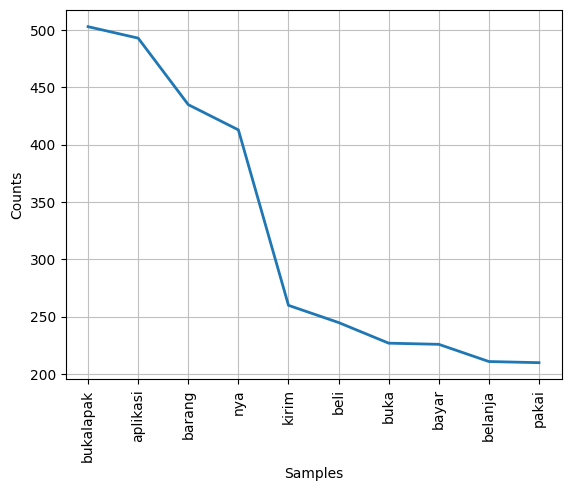

In [ ]:
import matplotlib.pyplot as plt

# plotting
fqdist.plot(10,cumulative=False)
plt.show()

In [ ]:
label = []
for index, row in name_dataframe.iterrows():
    if row["Rating"] == 5 or row["Rating"] == 4:
        label.append(1)
    else:
        label.append(0)

name_dataframe["label"] = label

name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_siap,label
0,yOga 04,1,2023-08-01 03:19:16,aplikasi marketplace paling ancur sistem bukab...,"[aplikasi, marketplace, paling, ancur, sistem,...","[aplikasi, marketplace, paling, ancur, sistem,...","[aplikasi, marketplace, paling, hancur, sistem...","[aplikasi, marketplace, hancur, sistem, bukaba...","[aplikasi, marketplace, hancur, sistem, bukaba...",aplikasi marketplace hancur sistem bukabantuan...,0
1,Imagination Music Store,1,2023-07-28 08:32:00,aplikasi yg sangat ribet tiap mau edit produk ...,"[aplikasi, yg, sangat, ribet, tiap, mau, edit,...","[aplikasi, yg, sangat, ribet, tiap, mau, edit,...","[aplikasi, yang, sangat, ribet, tiap, mau, edi...","[aplikasi, ribet, edit, produk, giliran, berha...","[aplikasi, ribet, edit, produk, gilir, hasil, ...",aplikasi ribet edit produk gilir hasil ujung n...,0
2,Mas bagoess Kocak,1,2023-07-27 22:26:26,buka bantuan bukalapak tidak berguna karena ti...,"[buka, bantuan, bukalapak, tidak, berguna, kar...","[buka, bantuan, bukalapak, tidak, berguna, kar...","[buka, bantuan, bukalapak, tidak, berguna, kar...","[buka, bantuan, bukalapak, berguna, dihubungi,...","[buka, bantu, bukalapak, guna, hubung, transak...",buka bantu bukalapak guna hubung transaksi jua...,0
3,Sis Maya,1,2023-07-22 10:54:24,saya sangat sedih sekali belanja lewat mitra b...,"[saya, sangat, sedih, sekali, belanja, lewat, ...","[saya, sangat, sedih, sekali, belanja, lewat, ...","[saya, sangat, sedih, sekali, belanja, lewat, ...","[sedih, belanja, mitra, bukalapak, live, bukab...","[sedih, belanja, mitra, bukalapak, live, bukab...",sedih belanja mitra bukalapak live bukabantuan...,0
4,Gb Jkt,1,2023-08-01 03:57:42,makin lama makin mengerikan belanja di bukalap...,"[makin, lama, makin, mengerikan, belanja, di, ...","[makin, lama, makin, mengerikan, belanja, di, ...","[makin, lama, makin, mengerikan, belanja, di, ...","[mengerikan, belanja, bukalapak, pembeli, dian...","[keri, belanja, bukalapak, beli, diangap, jaha...",keri belanja bukalapak beli diangap jahat main...,0
...,...,...,...,...,...,...,...,...,...,...,...
1295,Pengguna Google,5,2019-08-12 19:12:25,sya bingung tdk bisa login karena no telepon s...,"[sya, bingung, tdk, bisa, login, karena, no, t...","[sya, bingung, tdk, bisa, login, karena, no, t...","[saya, bingung, tidak, bisa, login, karena, no...","[bingung, login, no, telepon, nonaktif, meneri...","[bingung, login, no, telepon, nonaktif, terima...",bingung login no telepon nonaktif terima kode ...,1
1296,Pengguna Google,2,2018-12-14 14:06:35,banyak yg bilang flashdealnya seperti jin dlm ...,"[banyak, yg, bilang, flashdealnya, seperti, ji...","[banyak, yg, bilang, flashdealnya, seperti, ji...","[banyak, yang, bilang, flashdealnya, seperti, ...","[bilang, flashdealnya, jin, hitungan, detik, b...","[bilang, flashdealnya, jin, hitung, detik, bar...",bilang flashdealnya jin hitung detik barang le...,0
1297,Pengguna Google,1,2018-10-25 22:29:18,saya mempunyai beberapa item yang sudah saya m...,"[saya, mempunyai, beberapa, item, yang, sudah,...","[saya, mempunyai, beberapa, item, yang, sudah,...","[saya, mempunyai, beberapa, item, yang, sudah,...","[item, masukan, daftar, favorit, muncul, ya, m...","[item, masuk, daftar, favorit, muncul, ya, mun...",item masuk daftar favorit muncul ya muncul rec...,0
1298,Pengguna Google,1,2019-04-11 07:54:28,menu kategori barang kok gak bisa menampilkan ...,"[menu, kategori, barang, kok, gak, bisa, menam...","[menu, kategori, barang, kok, gak, bisa, menam...","[menu, kategori, barang, kok, enggak, bisa, me...","[menu, kategori, barang, menampilkan, ya, mena...","[menu, kategori, barang, tampil, ya, tampil, c...",menu kategori barang tampil ya tampil cari bar...,0


# **Subjekvity dan Polarity**

In [ ]:
from textblob import TextBlob
def getSubjectivity(review):
 return TextBlob(review).sentiment.subjectivity
def getPolarity(review):
 return TextBlob(review).sentiment.polarity
def analyze(score):
 if score < 0:
    return 'Negative'
 elif score == 0:
    return 'Neutral'
 else:
    return 'Positive'

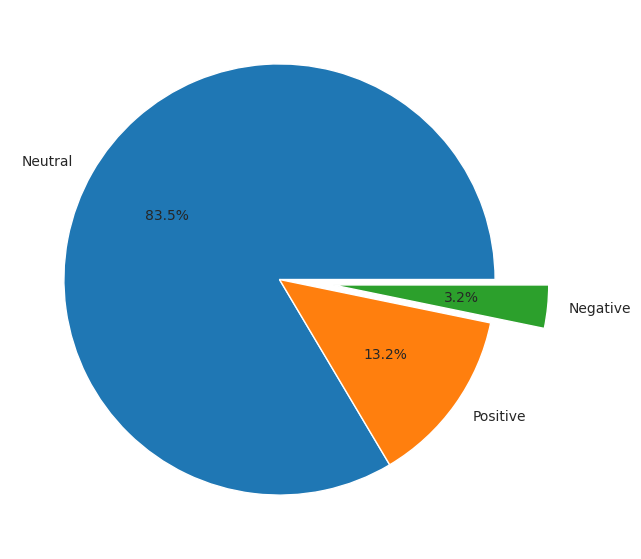

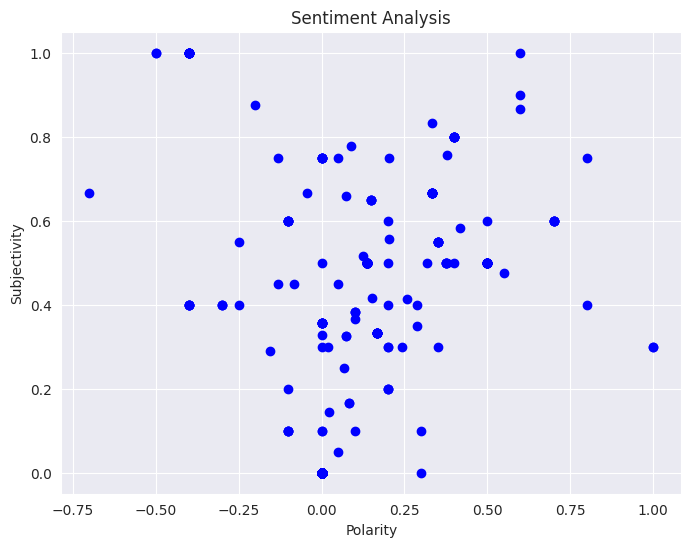

In [ ]:
name_dataframe['Subjectivity'] = name_dataframe['Ulasan_siap'].apply(getSubjectivity)
name_dataframe['Polarity'] = name_dataframe['Ulasan_siap'].apply(getPolarity)
name_dataframe['Sentiment'] = name_dataframe['Polarity'].apply(analyze)
name_dataframe.head()

In [ ]:
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_siap,label,Subjectivity,Polarity,TextBlob,month,Sentiment
0,yOga 04,1,2023-08-01 03:19:16,aplikasi marketplace paling ancur sistem bukab...,"[aplikasi, marketplace, paling, ancur, sistem,...","[aplikasi, marketplace, paling, ancur, sistem,...","[aplikasi, marketplace, paling, hancur, sistem...","[aplikasi, marketplace, hancur, sistem, bukaba...","[aplikasi, marketplace, hancur, sistem, bukaba...",aplikasi marketplace hancur sistem bukabantuan...,0,0.500000,0.136364,Positive,8,Positive
1,Imagination Music Store,1,2023-07-28 08:32:00,aplikasi yg sangat ribet tiap mau edit produk ...,"[aplikasi, yg, sangat, ribet, tiap, mau, edit,...","[aplikasi, yg, sangat, ribet, tiap, mau, edit,...","[aplikasi, yang, sangat, ribet, tiap, mau, edi...","[aplikasi, ribet, edit, produk, giliran, berha...","[aplikasi, ribet, edit, produk, gilir, hasil, ...",aplikasi ribet edit produk gilir hasil ujung n...,0,0.000000,0.000000,Neutral,7,Neutral
2,Mas bagoess Kocak,1,2023-07-27 22:26:26,buka bantuan bukalapak tidak berguna karena ti...,"[buka, bantuan, bukalapak, tidak, berguna, kar...","[buka, bantuan, bukalapak, tidak, berguna, kar...","[buka, bantuan, bukalapak, tidak, berguna, kar...","[buka, bantuan, bukalapak, berguna, dihubungi,...","[buka, bantu, bukalapak, guna, hubung, transak...",buka bantu bukalapak guna hubung transaksi jua...,0,0.000000,0.000000,Neutral,7,Neutral
3,Sis Maya,1,2023-07-22 10:54:24,saya sangat sedih sekali belanja lewat mitra b...,"[saya, sangat, sedih, sekali, belanja, lewat, ...","[saya, sangat, sedih, sekali, belanja, lewat, ...","[saya, sangat, sedih, sekali, belanja, lewat, ...","[sedih, belanja, mitra, bukalapak, live, bukab...","[sedih, belanja, mitra, bukalapak, live, bukab...",sedih belanja mitra bukalapak live bukabantuan...,0,0.500000,0.136364,Positive,7,Positive
4,Gb Jkt,1,2023-08-01 03:57:42,makin lama makin mengerikan belanja di bukalap...,"[makin, lama, makin, mengerikan, belanja, di, ...","[makin, lama, makin, mengerikan, belanja, di, ...","[makin, lama, makin, mengerikan, belanja, di, ...","[mengerikan, belanja, bukalapak, pembeli, dian...","[keri, belanja, bukalapak, beli, diangap, jaha...",keri belanja bukalapak beli diangap jahat main...,0,0.333333,0.166667,Positive,8,Positive


In [ ]:
from textblob import TextBlob


In [ ]:
name_dataframe['month'] = name_dataframe['Date'].dt.month

In [ ]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_siap,label,Subjectivity,Polarity,TextBlob,month,Sentiment
0,yOga 04,1,2023-08-01 03:19:16,aplikasi marketplace paling ancur sistem bukab...,"[aplikasi, marketplace, paling, ancur, sistem,...","[aplikasi, marketplace, paling, ancur, sistem,...","[aplikasi, marketplace, paling, hancur, sistem...","[aplikasi, marketplace, hancur, sistem, bukaba...","[aplikasi, marketplace, hancur, sistem, bukaba...",aplikasi marketplace hancur sistem bukabantuan...,0,0.500000,0.136364,Positive,8,Positive
1,Imagination Music Store,1,2023-07-28 08:32:00,aplikasi yg sangat ribet tiap mau edit produk ...,"[aplikasi, yg, sangat, ribet, tiap, mau, edit,...","[aplikasi, yg, sangat, ribet, tiap, mau, edit,...","[aplikasi, yang, sangat, ribet, tiap, mau, edi...","[aplikasi, ribet, edit, produk, giliran, berha...","[aplikasi, ribet, edit, produk, gilir, hasil, ...",aplikasi ribet edit produk gilir hasil ujung n...,0,0.000000,0.000000,Neutral,7,Neutral
2,Mas bagoess Kocak,1,2023-07-27 22:26:26,buka bantuan bukalapak tidak berguna karena ti...,"[buka, bantuan, bukalapak, tidak, berguna, kar...","[buka, bantuan, bukalapak, tidak, berguna, kar...","[buka, bantuan, bukalapak, tidak, berguna, kar...","[buka, bantuan, bukalapak, berguna, dihubungi,...","[buka, bantu, bukalapak, guna, hubung, transak...",buka bantu bukalapak guna hubung transaksi jua...,0,0.000000,0.000000,Neutral,7,Neutral
3,Sis Maya,1,2023-07-22 10:54:24,saya sangat sedih sekali belanja lewat mitra b...,"[saya, sangat, sedih, sekali, belanja, lewat, ...","[saya, sangat, sedih, sekali, belanja, lewat, ...","[saya, sangat, sedih, sekali, belanja, lewat, ...","[sedih, belanja, mitra, bukalapak, live, bukab...","[sedih, belanja, mitra, bukalapak, live, bukab...",sedih belanja mitra bukalapak live bukabantuan...,0,0.500000,0.136364,Positive,7,Positive
4,Gb Jkt,1,2023-08-01 03:57:42,makin lama makin mengerikan belanja di bukalap...,"[makin, lama, makin, mengerikan, belanja, di, ...","[makin, lama, makin, mengerikan, belanja, di, ...","[makin, lama, makin, mengerikan, belanja, di, ...","[mengerikan, belanja, bukalapak, pembeli, dian...","[keri, belanja, bukalapak, beli, diangap, jaha...",keri belanja bukalapak beli diangap jahat main...,0,0.333333,0.166667,Positive,8,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Pengguna Google,5,2019-08-12 19:12:25,sya bingung tdk bisa login karena no telepon s...,"[sya, bingung, tdk, bisa, login, karena, no, t...","[sya, bingung, tdk, bisa, login, karena, no, t...","[saya, bingung, tidak, bisa, login, karena, no...","[bingung, login, no, telepon, nonaktif, meneri...","[bingung, login, no, telepon, nonaktif, terima...",bingung login no telepon nonaktif terima kode ...,1,0.000000,0.000000,Neutral,8,Neutral
1296,Pengguna Google,2,2018-12-14 14:06:35,banyak yg bilang flashdealnya seperti jin dlm ...,"[banyak, yg, bilang, flashdealnya, seperti, ji...","[banyak, yg, bilang, flashdealnya, seperti, ji...","[banyak, yang, bilang, flashdealnya, seperti, ...","[bilang, flashdealnya, jin, hitungan, detik, b...","[bilang, flashdealnya, jin, hitung, detik, bar...",bilang flashdealnya jin hitung detik barang le...,0,0.666667,0.333333,Positive,12,Positive
1297,Pengguna Google,1,2018-10-25 22:29:18,saya mempunyai beberapa item yang sudah saya m...,"[saya, mempunyai, beberapa, item, yang, sudah,...","[saya, mempunyai, beberapa, item, yang, sudah,...","[saya, mempunyai, beberapa, item, yang, sudah,...","[item, masukan, daftar, favorit, muncul, ya, m...","[item, masuk, daftar, favorit, muncul, ya, mun...",item masuk daftar favorit muncul ya muncul rec...,0,0.000000,0.000000,Neutral,10,Neutral
1298,Pengguna Google,1,2019-04-11 07:54:28,menu kategori barang kok gak bisa menampilkan ...,"[menu, kategori, barang, kok, gak, bisa, menam...","[menu, kategori, barang, kok, gak, bisa, menam...","[menu, kategori, barang, kok, enggak, bisa, m

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# **Visualisasi Bobot Nilai**

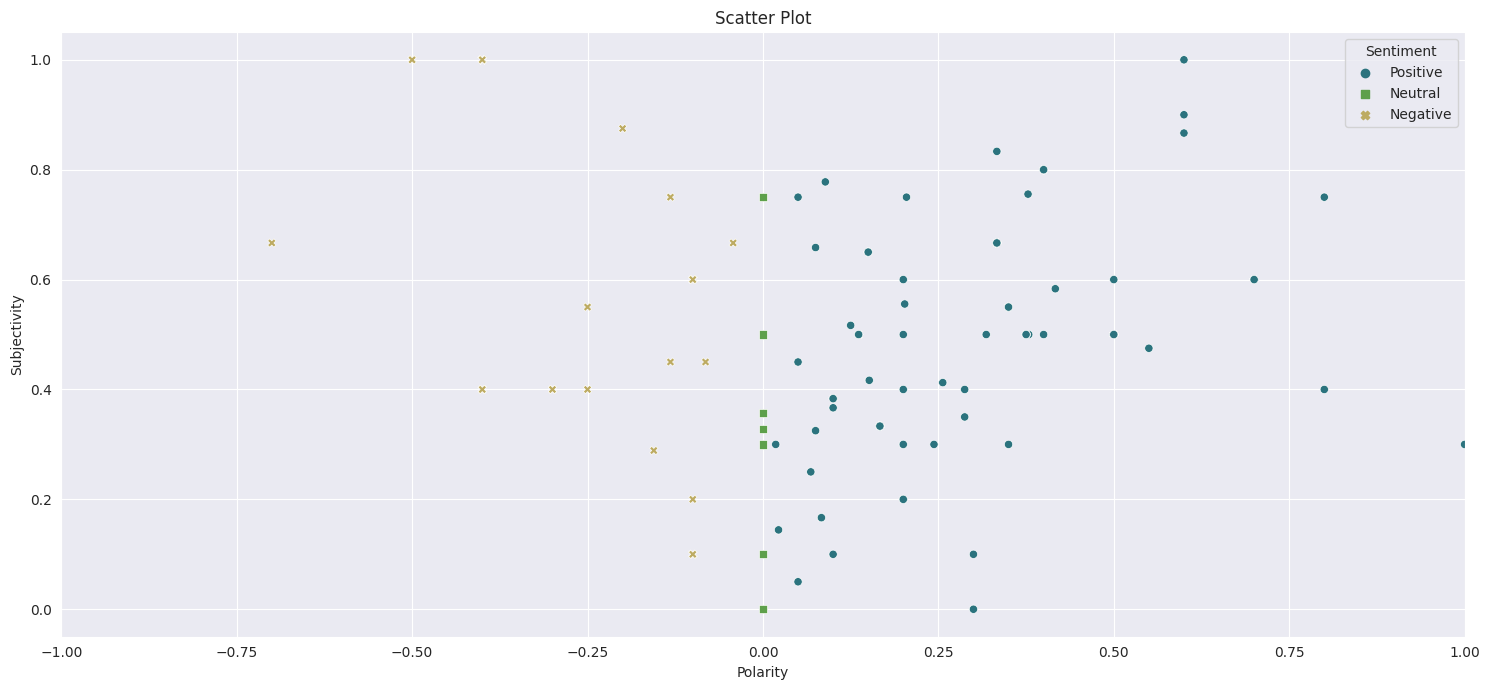

In [ ]:
# Create scatter plot
sns.set_style('darkgrid')
plt.figure(figsize = (15,7))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=name_dataframe, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

# **Visualiasi Polarity dan subjecvity perbulan**

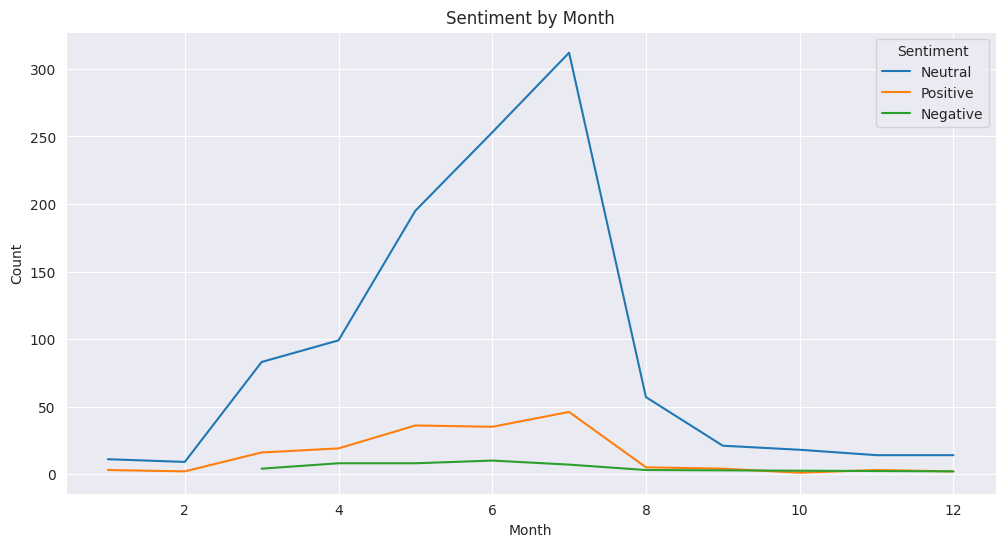

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by month and sentiment
sentiment_df = name_dataframe.groupby(['month', 'Sentiment']).size().reset_index(name='Count')


# Plot the sentiment counts by month
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Count', hue='Sentiment', data=sentiment_df)
plt.title('Sentiment by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

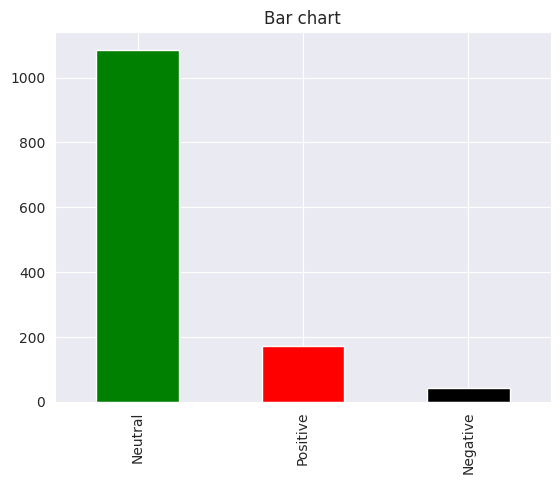

In [ ]:
sentimen_data=pd.value_counts(name_dataframe["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red", "black"])
plt.title('Bar chart')
plt.show()

In [ ]:
name_dataframe["Sentiment"].value_counts()

Neutral     1086
Positive     172
Negative      42
Name: Sentiment, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
Ulasan = name_dataframe['Ulasan_siap']

In [ ]:
Ulasan.isnull().sum()

0

# **Proses (TF-IDF)**

In [ ]:
#untuk menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

3673


In [ ]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutab abjad kata

{'aplikasi': 174,
 'marketplace': 2008,
 'hancur': 1245,
 'sistem': 3109,
 'bukabantuan': 567,
 'selesain': 2986,
 'lari': 1844,
 'live': 1912,
 'chatnya': 715,
 'paylaternya': 2477,
 'bobrok': 525,
 'sila': 3094,
 'coba': 732,
 'download': 976,
 'tau': 3269,
 'ribet': 2823,
 'edit': 1006,
 'produk': 2677,
 'gilir': 1177,
 'hasil': 1263,
 'ujung': 3508,
 'nya': 2295,
 'iklan': 1326,
 'jual': 1478,
 'hilang': 1280,
 'alias': 112,
 'otomatis': 2396,
 'hapus': 1253,
 'bukalapak': 582,
 'tolong': 3419,
 'tingkat': 3386,
 'ulang': 3510,
 'beli': 372,
 'tinggal': 3385,
 'buka': 566,
 'bantu': 287,
 'guna': 1210,
 'hubung': 1304,
 'transaksi': 3441,
 'barang': 299,
 'kirim': 1656,
 'kurir': 1759,
 'wahana': 3602,
 'resi': 2801,
 'diupdate': 950,
 'batal': 321,
 'update': 3539,
 'cek': 682,
 'manual': 1998,
 'jalan': 1421,
 'sedih': 2954,
 'belanja': 360,
 'mitra': 2135,
 'andal': 135,
 'terima': 3322,
 'pikir': 2602,
 'kalo': 1521,
 'pakai': 2425,
 'cod': 735,
 'keri': 1621,
 'diangap': 868,


In [ ]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 174)	1
  (0, 525)	1
  (0, 567)	1
  (0, 715)	1
  (0, 732)	1
  (0, 976)	1
  (0, 1245)	1
  (0, 1844)	1
  (0, 1912)	1
  (0, 2008)	1
  (0, 2477)	1
  (0, 2986)	1
  (0, 3094)	1
  (0, 3109)	2
  (0, 3269)	1
  (1, 112)	1
  (1, 174)	2
  (1, 372)	1
  (1, 582)	1
  (1, 1006)	1
  (1, 1177)	1
  (1, 1253)	1
  (1, 1263)	1
  (1, 1280)	1
  (1, 1326)	1
  :	:
  (1299, 350)	1
  (1299, 582)	1
  (1299, 732)	1
  (1299, 918)	1
  (1299, 1250)	1
  (1299, 1318)	1
  (1299, 1460)	1
  (1299, 1504)	1
  (1299, 1544)	1
  (1299, 1601)	1
  (1299, 1695)	1
  (1299, 1735)	1
  (1299, 1866)	1
  (1299, 1952)	1
  (1299, 2152)	1
  (1299, 2295)	1
  (1299, 2380)	1
  (1299, 2587)	1
  (1299, 2664)	1
  (1299, 2809)	1
  (1299, 2883)	1
  (1299, 3195)	1
  (1299, 3325)	1
  (1299, 3482)	1
  (1299, 3488)	1


In [ ]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

aplikasi ribet edit produk gilir hasil ujung nya iklan produk jual hilang alias otomatis hapus bukalapak tolong tingkat ulang sistem jual beli tinggal aplikasi


In [ ]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 112)	1
  (0, 174)	2
  (0, 372)	1
  (0, 582)	1
  (0, 1006)	1
  (0, 1177)	1
  (0, 1253)	1
  (0, 1263)	1
  (0, 1280)	1
  (0, 1326)	1
  (0, 1478)	2
  (0, 2295)	1
  (0, 2396)	1
  (0, 2677)	2
  (0, 2823)	1
  (0, 3109)	1
  (0, 3385)	1
  (0, 3386)	1
  (0, 3419)	1
  (0, 3508)	1
  (0, 3510)	1


In [ ]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[7.4777413  7.4777413  7.07227619 ... 6.56145057 7.4777413  7.4777413 ]
  (0, 3510)	0.2071238459621694
  (0, 3508)	0.28081336641706695
  (0, 3419)	0.15317161747396313
  (0, 3386)	0.19310530767060693
  (0, 3385)	0.21626426449567396
  (0, 3109)	0.1794520880224257
  (0, 2823)	0.17022005521259614
  (0, 2677)	0.37321255188498426
  (0, 2396)	0.1941173210654745
  (0, 2295)	0.11055372074433858
  (0, 1478)	0.29570463624269816
  (0, 1326)	0.21978779602579804
  (0, 1280)	0.1840901257617865
  (0, 1263)	0.20073284040823058
  (0, 1253)	0.21460291095742093
  (0, 1177)	0.25413087806187584
  (0, 1006)	0.2503005812214325
  (0, 582)	0.09616030007836544
  (0, 372)	0.12536544524998255
  (0, 174)	0.20066760038354978
  (0, 112)	0.2681494163534383


In [ ]:
data_label = name_dataframe[["Nama pengguna", "Ulasan_siap", "Sentiment"]]

In [ ]:
data_label["Ulasan_siap"] = data_label["Ulasan_siap"].fillna("tidak ada komentar")

<ipython-input-80-63aa05b24bd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label["Ulasan_siap"] = data_label["Ulasan_siap"].fillna("tidak ada komentar")


In [ ]:
data_label.to_excel("data_label.xlsx")

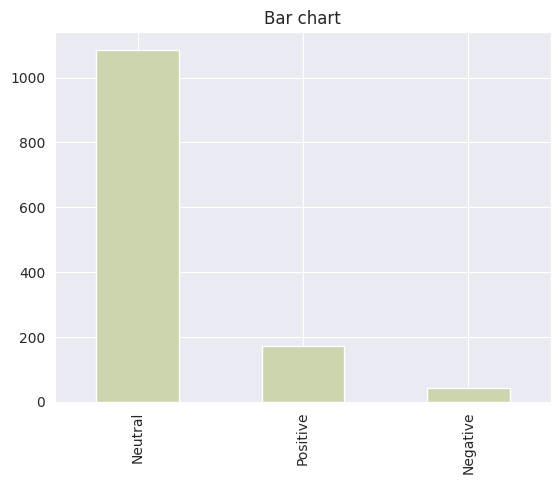

In [ ]:
sentimen_data=pd.value_counts(data_label["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["#ccd5ae"])
plt.title('Bar chart')
plt.show()

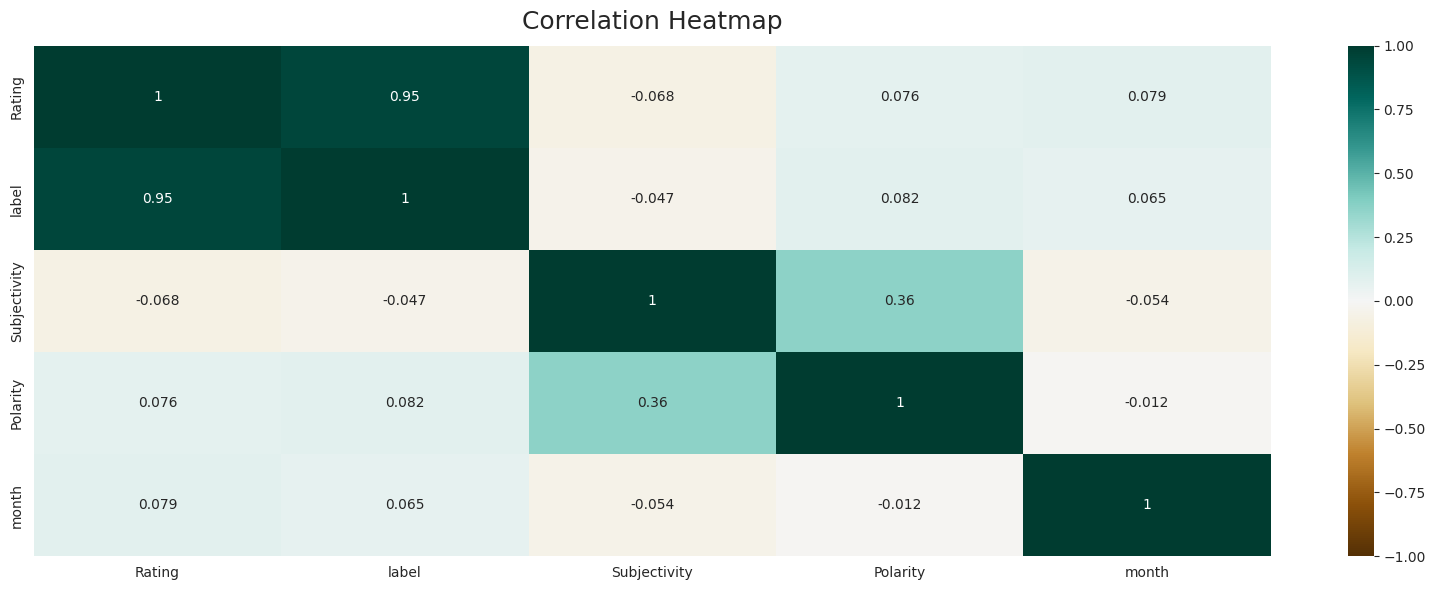

In [ ]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(name_dataframe.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.tight_layout()

In [ ]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize',
       'ulasan_ears', 'Ulasan_normalized', 'Ulasan_stop_removed',
       'Ulasan_Stemmed', 'Ulasan_siap', 'label', 'Subjectivity', 'Polarity',
       'TextBlob', 'month', 'Sentiment'],
      dtype='object')

In [ ]:
train_s3 = data_label[data_label["Sentiment"] == 'Neutral']

# **Proses visualiasi kata terbanyak dari Neutral**

In [ ]:
train_s3["Ulasan_siap"] = train_s3["Ulasan_siap"].fillna("tidak ada komentar")

<ipython-input-86-4fc6d4cc0ecf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s3["Ulasan_siap"] = train_s3["Ulasan_siap"].fillna("tidak ada komentar")


Neutral words


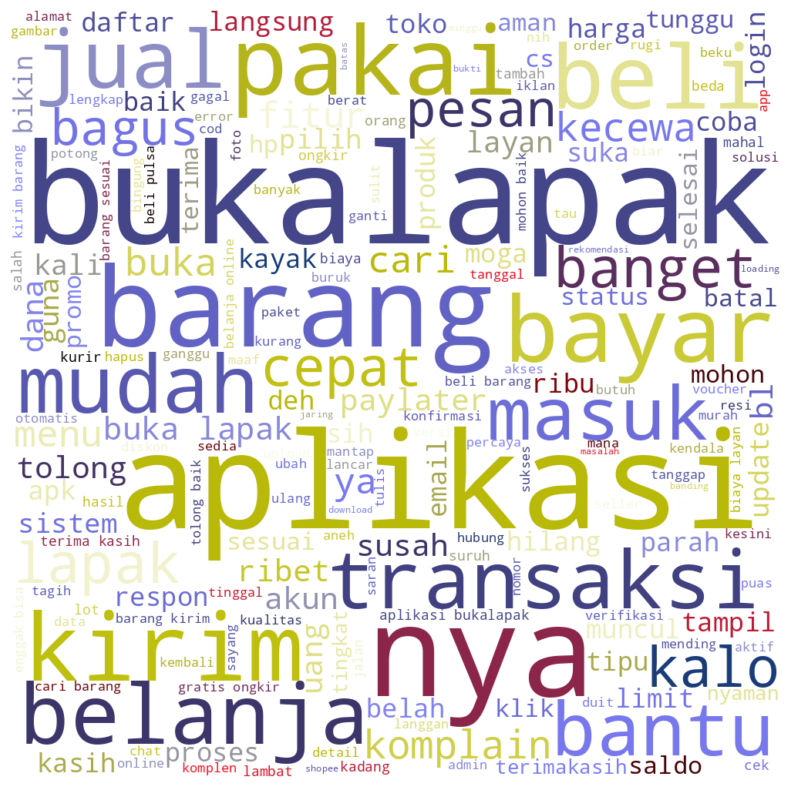

In [ ]:
all_text_s0 = ' '.join(word for word in train_s3["Ulasan_siap"])
wordcloud = WordCloud(colormap='gist_stern', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
print("Neutral words")
plt.show()

In [ ]:
from wordcloud import WordCloud

In [ ]:
train_s0 = data_label[data_label["Sentiment"] == 'Negative']

In [ ]:
train_s0["Ulasan_siap"] = train_s0["Ulasan_siap"].fillna("tidak ada komentar")

<ipython-input-90-dc46e426e77c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["Ulasan_siap"] = train_s0["Ulasan_siap"].fillna("tidak ada komentar")


In [ ]:
train_s0

,Nama pengguna,Ulasan_siap,Sentiment
10,Syamriza Alam,buka bantu nya bantu memperaulitcall center ny...,Negative
12,Mirdad Wangsa,rugi beli masak barang bayar nunggunya batal u...,Negative
22,Popi Anggraini,transfer baca virtual account verifikasi saldo...,Negative
70,Adityo Nur,beku alas kalo bekuin akun baik kasih alas jal...,Negative
71,Dadang Setiaji,saldo dana sambung tibatiba potong voucher gam...,Negative
75,agus jatnika,kasih bintang segitu blapak buka detail pesan ...,Negative
196,Ahmad Sahrul,playlater kalo hp nomor nya hilang alas ktp pa...,Negative
209,Dery Riyanto (STARK),tangan kirim jam suruh tunggu batalin pesan je...,Negative
237,hidayat mudaris,tolong rumit verifikasi akun saldo bukalapak p...,Negative
278,Ilham Padka Wijaya,bukalapak marketplace nya sellerseller tipu ka...,Negative


# **Proses visualiasi kata terbanyak dari Negatif**

Negatif words


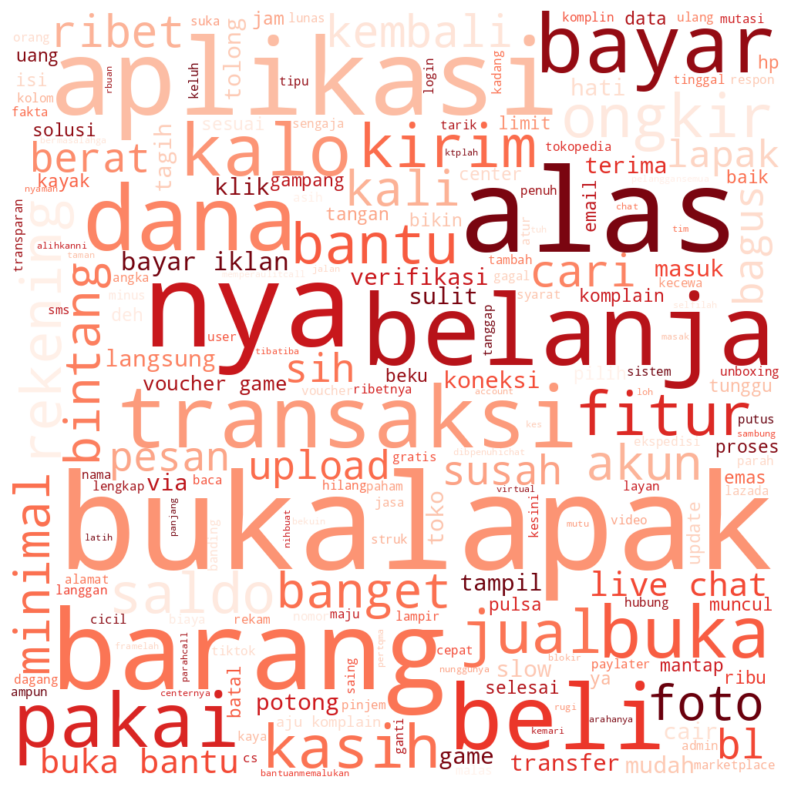

In [ ]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan_siap"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
print("Negatif words")
plt.show()

# **Proses visualiasi kata terbanyak dari Positif**

In [ ]:
train_s1 = data_label[data_label["Sentiment"] == 'Positive']

In [ ]:
train_s1["Ulasan_siap"] = train_s1["Ulasan_siap"].fillna("tidak ada komentar")

<ipython-input-94-d1952b0b5859>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["Ulasan_siap"] = train_s1["Ulasan_siap"].fillna("tidak ada komentar")


In [ ]:
train_s1

,Nama pengguna,Ulasan_siap,Sentiment
0,yOga 04,aplikasi marketplace hancur sistem bukabantuan...,Positive
3,Sis Maya,sedih belanja mitra bukalapak live bukabantuan...,Positive
4,Gb Jkt,keri belanja bukalapak beli diangap jahat main...,Positive
6,Rino Syaprudin,bukalapak kena charge rp kalo beli barang roda...,Positive
9,Muhammad Hafidz,rugi rp top up dana bukalapak bayar via atm br...,Positive
...,...,...,...
1271,Pengguna Google,alhamdulillah ubah aplikasi lelet banget user ...,Positive
1272,Pengguna Google,rada kecewa top up bayar tagih saldo rekning o...,Positive
1290,Muhammad Yusuf Firdaus,admin pesan nya baik pesan masuk buka muncul b...,Positive
1292,ysppo hija,fitur chat jengkel delay parah boro asih notif...,Positive


Positif words


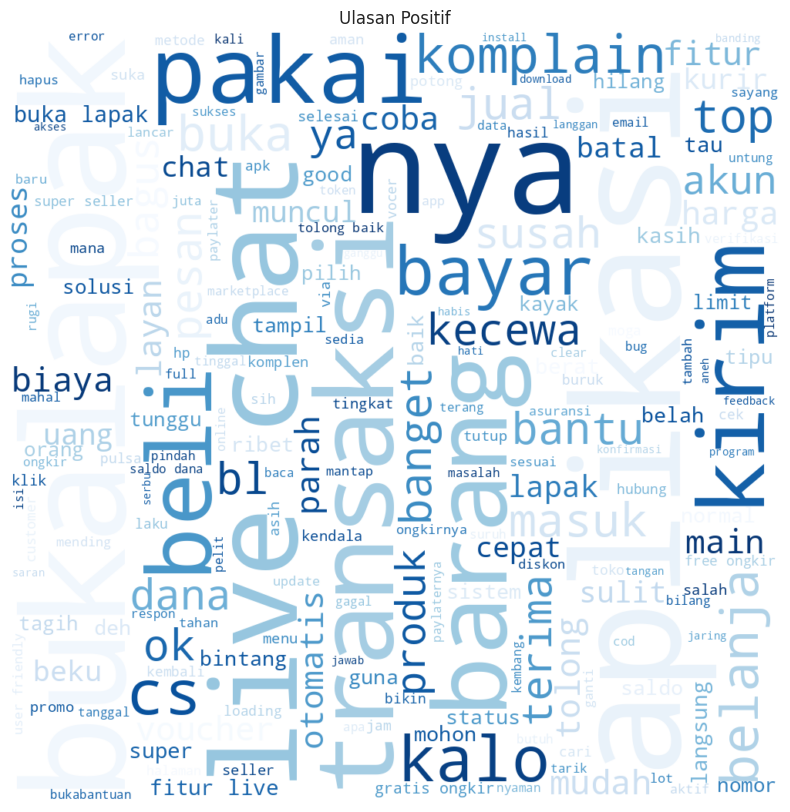

In [ ]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan_siap"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
print("Positif words")
plt.show()

In [ ]:
data_label['Ulasan_clean'] = data_label['Ulasan_siap'].fillna("tidak ada komentar")

<ipython-input-97-2ed151e306fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['Ulasan_clean'] = data_label['Ulasan_siap'].fillna("tidak ada komentar")


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# **Mensplit Data Ulasan Siap Dan Data Sentiment**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_siap'], data_label['Sentiment'],
                                                    test_size=0.1, stratify=data_label['Sentiment'], random_state=30)

# **Melakukan Pembelajaran Melihat Akurasi Dan Mendapatkan Kolom Baru Prediksi**

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_label['Ulasan_siap'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data_label['Sentiment'], test_size=0.2, random_state=42)

# Train the Gaussian Naive Bayes classifier on the training set
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)

# Evaluate the classifier on the testing set
accuracy = gnb.score(X_test.toarray(), y_test)
print('Accuracy:', accuracy)

# Evaluate the classifier on the testing set
y_pred = gnb.predict(X_test.toarray())
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Use the classifier to predict the sentiment class for all reviews in the dataset
data_label['predicted_sentiment_class'] = gnb.predict(X.toarray())

# Save the resulting dataframe to a new CSV file
data_label.to_csv('predicted_sentiment1.csv', index=False)

Accuracy: 0.6230769230769231
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         9
     Neutral       0.86      0.66      0.75       211
    Positive       0.29      0.55      0.38        40

    accuracy                           0.62       260
   macro avg       0.38      0.40      0.38       260
weighted avg       0.75      0.62      0.67       260



<ipython-input-101-100d2ce1e090>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['predicted_sentiment_class'] = gnb.predict(X.toarray())


In [ ]:
import numpy as np

X_train = X_train.toarray()
X_test = X_test.toarray()


# **Melihat Akurasi Terbaik**



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Gaussian Naive Bayes with original data
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_gnb = gnb.predict(X_test)
print('Original Results:')
print(classification_report(y_test, y_gnb))
print(confusion_matrix(y_test, y_gnb))
print('Accuracy with original test data:', accuracy_score(y_test, y_gnb))

# Gaussian Naive Bayes with undersampling mengurangi class
rus = RandomUnderSampler(random_state=1)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
gnb = GaussianNB()
gnb.fit(X_rus, y_rus)
y_gnb = gnb.predict(X_test)
print('Undersampling Results:')
print(classification_report(y_test, y_gnb))
print('Accuracy with undersampling test data:', accuracy_score(y_test, y_gnb))

# Gaussian Naive Bayes with oversampling menggandakan class
smote = SMOTE(random_state=1)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
gnb = GaussianNB()
gnb.fit(X_smote, y_smote)
y_gnb = gnb.predict(X_test)
print('Oversampling Results:')
print(classification_report(y_test, y_gnb))
print('Accuracy with oversampling test data:', accuracy_score(y_test, y_gnb))

# Gaussian Naive Bayes with combined oversampling and undersampling menggandakan dan mengurangi class
rus = RandomUnderSampler(random_state=1)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

smote = SMOTE(random_state=1)
X_smt, y_smt = smote.fit_resample(X_rus, y_rus)

gnb = GaussianNB()
gnb.fit(X_smt, y_smt)
y_gnb = gnb.predict(X_test)
print('Combined Oversampling and Undersampling Results:')
print(classification_report(y_test, y_gnb))
print('Accuracy with combined oversampling and undersampling test data:', accuracy_score(y_test, y_gnb))


Original Results:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         9
     Neutral       0.86      0.66      0.75       211
    Positive       0.29      0.55      0.38        40

    accuracy                           0.62       260
   macro avg       0.38      0.40      0.38       260
weighted avg       0.75      0.62      0.67       260

[[  0   6   3]
 [ 20 140  51]
 [  2  16  22]]
Accuracy with original test data: 0.6230769230769231
Undersampling Results:
              precision    recall  f1-score   support

    Negative       0.05      0.44      0.09         9
     Neutral       0.90      0.30      0.45       211
    Positive       0.22      0.60      0.32        40

    accuracy                           0.35       260
   macro avg       0.39      0.45      0.29       260
weighted avg       0.77      0.35      0.42       260

Accuracy with undersampling test data: 0.35384615384615387
Oversampling Results:
              pre

In [ ]:
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer             #menghitung n menjumlah kan dan menjumlah kan tf and n berdasarkan seluruh dokumen
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [ ]:
data_label['predicted_sentiment_class'].value_counts()

Neutral     938
Positive    283
Negative     79
Name: predicted_sentiment_class, dtype: int64

# **VISUALISASI Hasil Prediksi**

<Axes: >

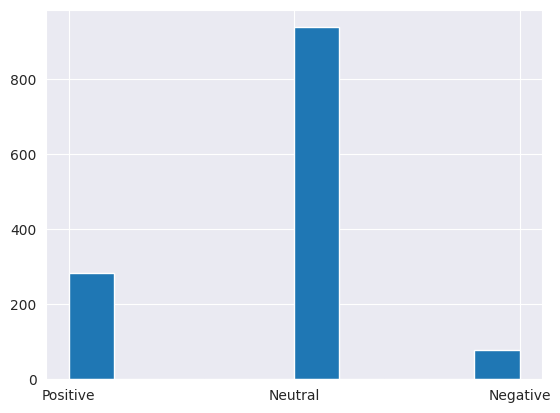

In [ ]:
data_label['predicted_sentiment_class'].hist()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# **CrossValidation gaussion naive bayes**

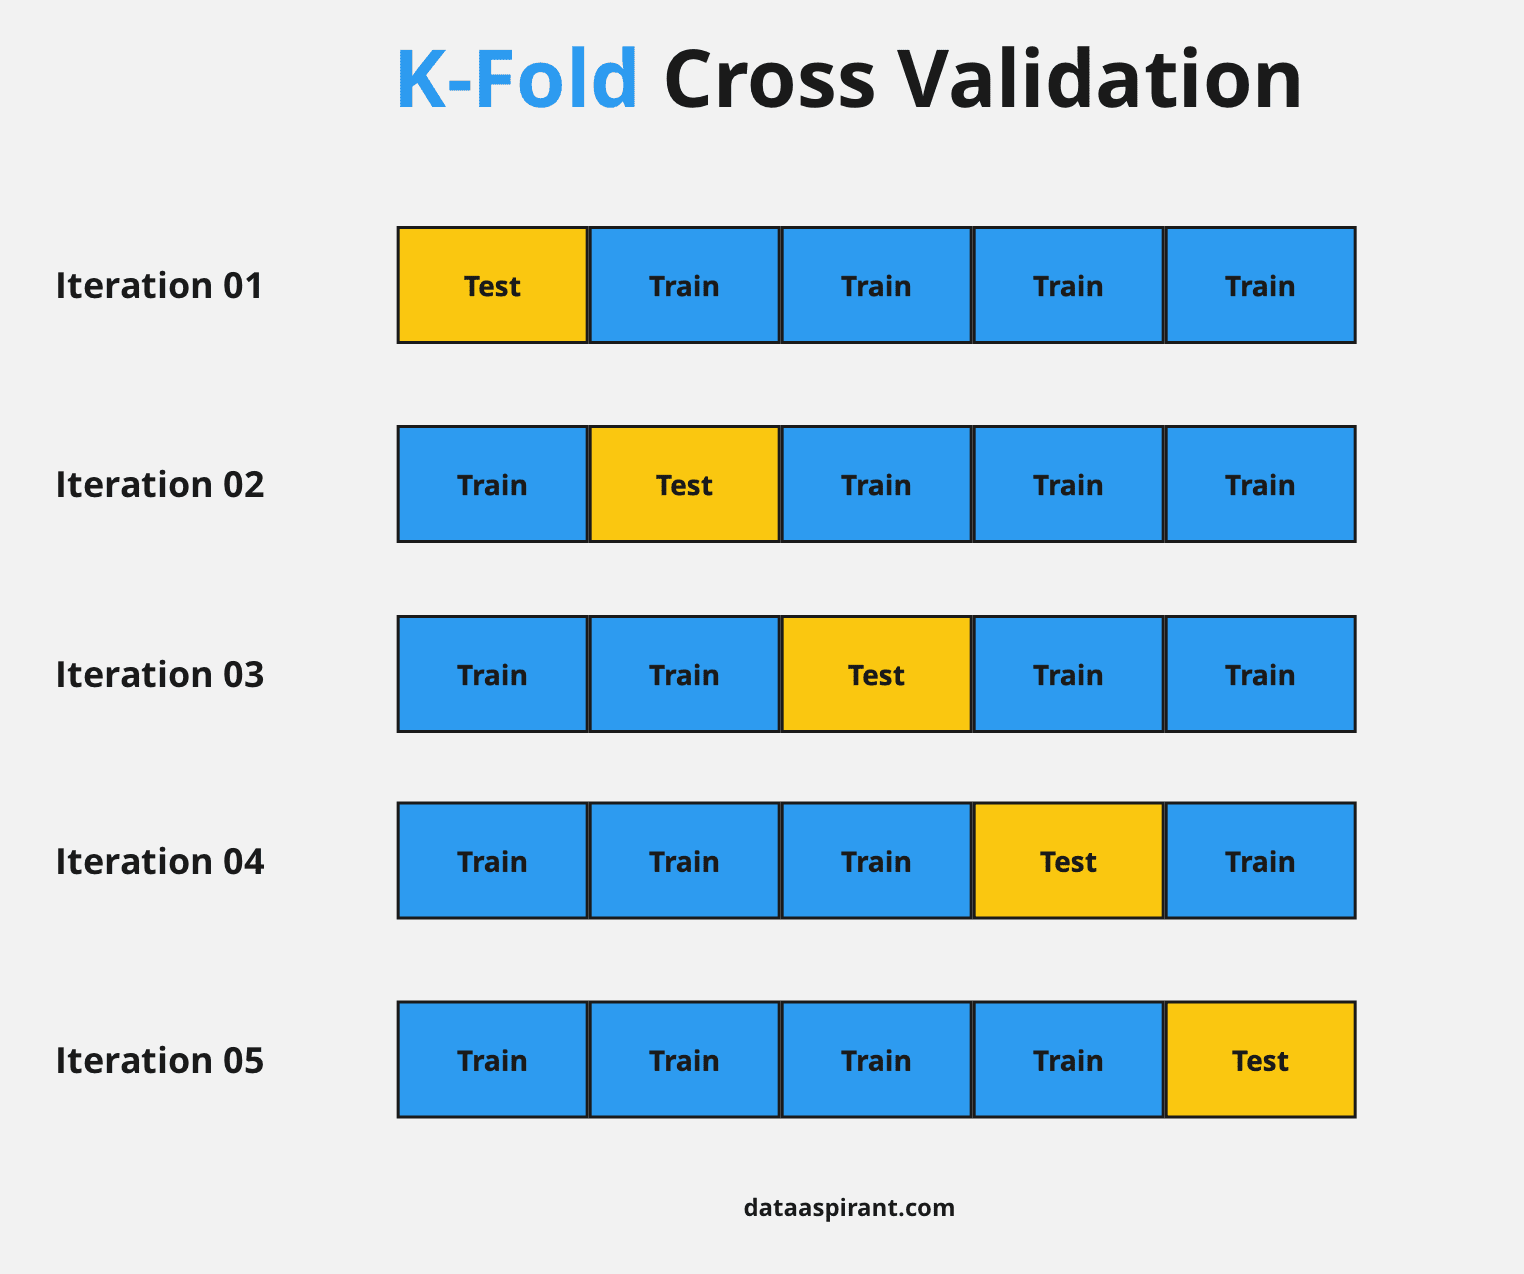

**sample random**

mengambil secara acak dari daftar sample atau sampling frame yang tersedia setiap individu memiliki peluang yang sama untuk terpilih
peluang tersebut ada melakukan peluang sama ketika mempunyai data besar akan memliki peluang lebih besar untuk terpilih tetapi sebaliknya ketika mempunyai data dikit dapat peluang lebih sedikit

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_siap'], data_label['Sentiment'],
                                                    test_size=0.1, stratify=data_label['Sentiment'], random_state=30)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create the Naive Bayes Classifier object
gnb = GaussianNB()

# Perform cross-validation
scores = cross_val_score(gnb, X_train.toarray(), y_train, cv=5)

# Print the cross-validation scores
print('Cross-validation scores:', scores)

# Fit the classifier to the training data
gnb.fit(X_train.toarray(), y_train)

# Predict the sentiment of the test data
y_pred = gnb.predict(X_test.toarray())

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Cross-validation scores: [0.59401709 0.61538462 0.6965812  0.58119658 0.6025641 ]
Confusion Matrix:
 [[ 0  4  0]
 [15 67 27]
 [ 0 10  7]]


In [ ]:
# Convert sparse matrix to dense numpy array
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Print the scores on the training and test sets
print('Training set score: {:.4f}'.format(gnb.score(X_train_dense, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test_dense, y_test)))

#ternyata permasalahannya bukan traning tapi test set score nya 0.50%

Training set score: 0.8915
Test set score: 0.5692


In [ ]:
accuracy = gnb.score(X_test.toarray(), y_test)
print('Accuracy:', accuracy)

Accuracy: 0.5692307692307692


In [ ]:
vectorizer

TfidfVectorizer()

In [ ]:
nb = GaussianNB(var_smoothing=1.0) # untuk tidak overviting

# **Data Prediksi**

In [ ]:
data_label.tail(100)

,Nama pengguna,Ulasan_siap,Sentiment,Ulasan_clean,predicted_sentiment_class
1200,asmuni abbas,layan cepat ribet,Neutral,layan cepat ribet,Negative
1201,Andri Anto,asu masuk nomer telpon susah nomer daftar akun...,Neutral,asu masuk nomer telpon susah nomer daftar akun...,Neutral
1202,Rahmad Pontianak,aplikasi bukalapak nyaman belanja,Neutral,aplikasi bukalapak nyaman belanja,Positive
1203,Jukih Kurniawan,gampang simpel bantu,Neutral,gampang simpel bantu,Neutral
1204,Hack'z Up02,aplikasi lot sejarahbuktiin sendirikalah toko ...,Neutral,aplikasi lot sejarahbuktiin sendirikalah toko ...,Neutral
...,...,...,...,...,...
1295,Pengguna Google,bingung login no telepon nonaktif terima kode ...,Neutral,bingung login no telepon nonaktif terima kode ...,Neutral
1296,Pengguna Google,bilang flashdealnya jin hitung detik barang le...,Positive,bilang flashdealnya jin hitung detik barang le...,Positive
1297,Pengguna Google,item masuk daftar favorit muncul ya muncul rec...,Neutral,item masuk daftar favorit muncul ya muncul rec...,Neutral
1298,Pengguna Google,menu kategori barang tampil ya tampil cari bar...,Neutral,menu kategori barang tampil ya tampil cari bar...,Neutral


In [ ]:
X_test

<130x3419 sparse matrix of type '<class 'numpy.float64'>'
	with 1532 stored elements in Compressed Sparse Row format>

In [ ]:
X_train

<1170x3419 sparse matrix of type '<class 'numpy.float64'>'
	with 16509 stored elements in Compressed Sparse Row format>

In [ ]:
y_test

436      Neutral
734      Neutral
1055     Neutral
398      Neutral
224      Neutral
          ...   
713     Positive
876      Neutral
307      Neutral
1075     Neutral
1053     Neutral
Name: Sentiment, Length: 130, dtype: object

In [ ]:
y_train

698      Neutral
592      Neutral
1090     Neutral
205      Neutral
463      Neutral
          ...   
1035     Neutral
400     Positive
630      Neutral
335     Negative
729      Neutral
Name: Sentiment, Length: 1170, dtype: object

In [ ]:
print(y_train)

698      Neutral
592      Neutral
1090     Neutral
205      Neutral
463      Neutral
          ...   
1035     Neutral
400     Positive
630      Neutral
335     Negative
729      Neutral
Name: Sentiment, Length: 1170, dtype: object


# **CONFIUSIN MATRIK**
melihat seberapa baik distribusi dari setiap kelas

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Assuming you have loaded the data into the 'data_label' DataFrame.

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Transform the text data into numerical feature vectors
X = vectorizer.fit_transform(data_label['Ulasan_siap'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data_label['Sentiment'], test_size=0.3, random_state=42)

# Train the Gaussian Naive Bayes classifier on the training set
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)

# Evaluate the classifier on the testing set
accuracy = gnb.score(X_test.toarray(), y_test)
print('Accuracy:', accuracy)

# Evaluate the classifier on the testing set
y_pred = gnb.predict(X_test.toarray())

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report with precision, recall, F1-score for each class
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Use the classifier to predict the sentiment class for all reviews in the dataset
data_label['predicted_sentiment_class'] = gnb.predict(X.toarray())

# Save the resulting dataframe to a new CSV file
data_label.to_csv('predicted_sentiment1.csv', index=False)


Accuracy: 0.6435897435897436
Confusion Matrix:
[[  1  10   0]
 [ 29 217  78]
 [  1  21  33]]
Classification Report:
              precision    recall  f1-score   support

    Negative       0.03      0.09      0.05        11
     Neutral       0.88      0.67      0.76       324
    Positive       0.30      0.60      0.40        55

    accuracy                           0.64       390
   macro avg       0.40      0.45      0.40       390
weighted avg       0.77      0.64      0.69       390



<ipython-input-123-27db70896ee7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['predicted_sentiment_class'] = gnb.predict(X.toarray())
